In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from DataProcTools.DataCleaning import MissingValues
import seaborn as sns
sns.set_theme(style="whitegrid")

# What is the most common city for holding the olympic games?
let's get the city frequency of the olympics using the following dataset


In [2]:
dataset = pd.read_csv('data/athlete_events.csv')
dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Steps
 - Project the City and Games column
 - Group the dataframes by Games
 - Count the frequency of the city

[Text(0.5, 0, 'Most popular cities for hosting the olympics')]

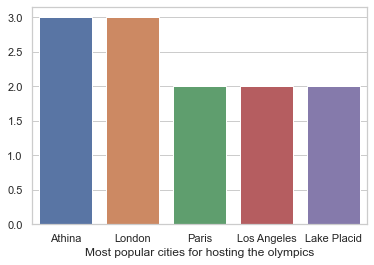

In [3]:
frequent_cities = dataset[['City','Games']].groupby('Games').first().value_counts('City')
top = frequent_cities[:5]

ax = sns.barplot(x=top.index,y=top)
ax.set(xlabel='Most popular cities for hosting the olympics')

## it seems that the olympics is most commonly hosted in these 5 cities

### Note that there are 2 different seasons for the summer games, the season could be a possible factor in the popularity of the city, so we split our dataset into summer and winter


[Text(0.5, 0, 'most commonly hosted city for summer olympics')]

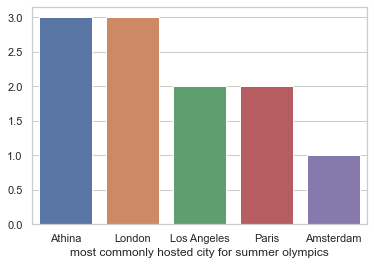

In [4]:
summer_ds,winter_ds =  dataset[dataset.Season=='Summer'],dataset[dataset.Season=='Winter']
summer_city_freq,winter_city_freq = summer_ds[['City','Games']].groupby('Games').first().value_counts('City'),winter_ds[['City','Games']].groupby('Games').first().value_counts('City')
top_summer = summer_city_freq[:5]
ax = sns.barplot(x=top_summer.index,y=top_summer.values)
ax.set(xlabel='most commonly hosted city for summer olympics')

#### these are the most frequent destinations for the summer activities, they have moderate weather during the summer, making them suitable for diverse selection of activities

[Text(0.5, 0, 'most commonly hosted city for winter olympics')]

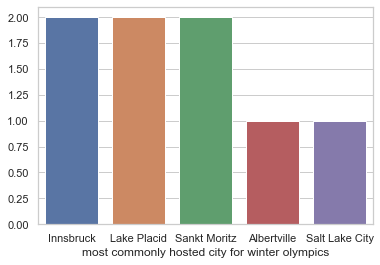

In [5]:
top_winter = winter_city_freq[:5]
ax = sns.barplot(x=top_winter.index,y=top_winter.values)
ax.set(xlabel='most commonly hosted city for winter olympics')

#### the most hosted cities for winter olympics have ideal weather and terrain for activities like skiing and skating

## IMPORTANT NOTE : the above conclusion is merely based on the total frequency of the olympics in every city, therefore does not reflect the scale of the pariticipation in the games, which leads us to another questions

# Which Cities host the largest Olympic games?

## Steps
 - Project the City
 - Since each row represents a participant in the olympics, we count the frequency of the city
 - Which should represent the total number of participants that have joined the olympics in a particular city

[Text(0.5, 0, 'most popular city for olympics')]

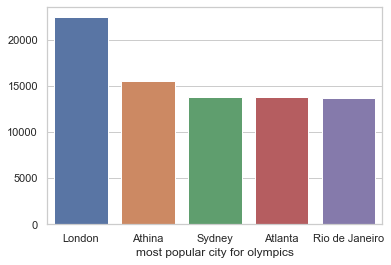

In [6]:
popular_cities =  dataset[['City','Games']].value_counts('City')
top = popular_cities[:5]
ax = sns.barplot(x=top.index,y=top.values)
ax.set(xlabel='most popular city for olympics')

## London takes the lead by the total number of pariticipants that they hosted

### we will also do our summer/winter split here


In [10]:
popular_summer_cities,popular_winter_cities = summer_ds[['City']].value_counts('City'),winter_ds[['City']].value_counts('City')

[Text(0.5, 0, 'most popular city for summer olympics')]

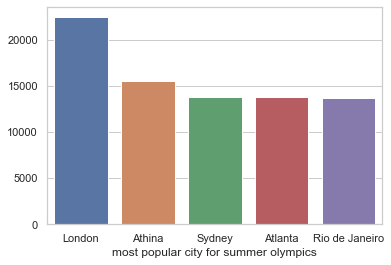

In [11]:
top = popular_summer_cities[:5]
ax = sns.barplot(x=top.index,y=top.values)
ax.set(xlabel='most popular city for summer olympics')

## the lead is still consistent
### let's check out the winter

[Text(0.5, 0, 'most popular city for winter olympics')]

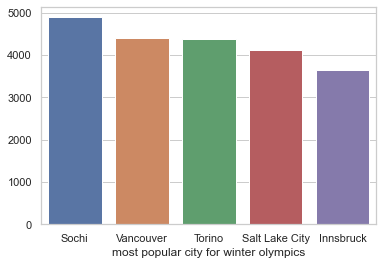

In [12]:

top = popular_winter_cities[:5]
ax = sns.barplot(x=top.index,y=top.values)
ax.set(xlabel='most popular city for winter olympics')

## these are the winter season cities with the largest pariticipants